In [1]:
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics
import itertools

In [2]:
%load_ext tensorboard

In [3]:
logdir='log'

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.1627 - accuracy: 0.9497 - val_loss: 0.0599 - val_accuracy: 0.9807
Epoch 2/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0331 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0347 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0303 - val_accuracy: 0.9897


In [8]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [9]:
classes=[0,1,2,3,4,5,6,7,8,9]

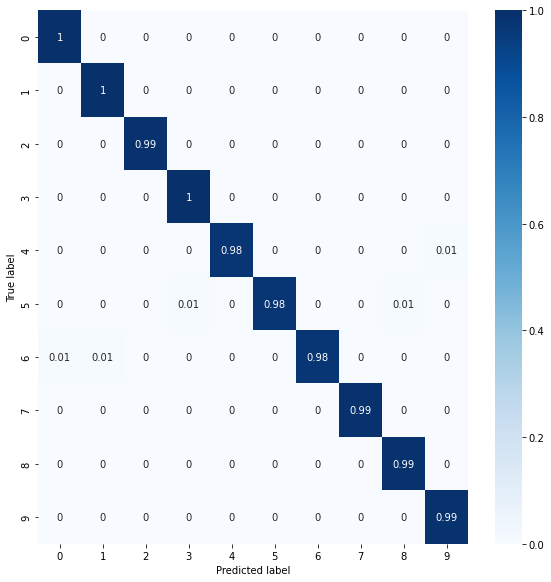

In [10]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
def get_confusion_matrix(reais, preditos, labels):
    if len(labels) > 2:
        return None

    if len(reais) != len(preditos):
        return None
    
    # considerando a primeira classe como a positiva e a segunda a negativa
    true_class = labels[0]
    negative_class = labels[1]

    # valores corretos
    tp = 0
    tn = 0
    # valores incorretos
    fp = 0
    fn = 0
    
    for (indice, v_real) in enumerate(reais):
        v_predito = preditos[indice]

        # se trata de um valor real da classe positiva
        if v_real == true_class:
            tp += 1 if v_predito == v_real else 0
            fp += 1 if v_predito != v_real else 0
        else:
            tn += 1 if v_predito == v_real else 0
            fn += 1 if v_predito != v_real else 0
    
    return np.array([
        # valores da classe positiva
        [ tp, fp ],
        # valores da classe negativa
        [ fn, tn ]
    ])

In [12]:
conf = metrics.confusion_matrix(y_true, y_pred, labels=[1,0])
conf

array([[1134,    0],
       [   1,  978]])

Text(0.5, 15.0, 'Predicted label')

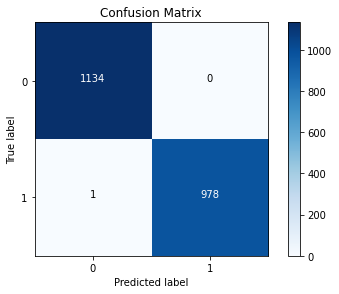

In [13]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [14]:
# from the confusion matrix
TP = true_pos = 974
TN = true_neg = 1110
FP = false_pos = 3
FN = false_neg = 1

## Métricas

Um dicionário para armazenar os resultados das métricas.

In [15]:
results = {}

### Sensibilidade

- A sensibilidade (também conhecida como recall ou revocação). Essa métrica avalia a capacidade do método de detectar com sucesso resultados classificados como positivos. Ela pode ser obtida pela equação:

Sensibilidade: VP/(VP+FN)

In [16]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.999


### Especificidade
- Especificidade avalia a capacidade do método de detectar resultados negativos. Podemos calculá-la usando a equação:

Especificidade = VN/(VN+FP)

In [17]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.997


### Acurácia
- A acurácia (accuracy ou ACC) é considerada uma das métricas mais simples e importantes. Ela avalia simplesmente o percentual de acertos, ou seja, ela pode ser obtida pela razão entre a quantidade de acertos e o total de entradas:
ACC = (TP+TN)/(TP+FP+FN+TN)

In [18]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.998


### Precisão
- A precisão é uma métrica que avalia a quantidade de verdadeiros positivos sobre a soma de todos os valores positivos:
precisão = TP/(TP+FP)

In [19]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.997


### F-Score
- F–measure, F-score ou score F1 é uma média harmônica calculada com base na precisão e na revocação. Ela pode ser obtida com base na equação:


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [20]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.998
